<div class="alert alert-vlock alert-info"> Exploratory data analysis of hotels in London Part I </div>

Data can be found here:

https://data.world/promptcloud/customer-of-reviews-of-london-based-hotels 

The dataset contains reviews of the top 10 most and least expensive hotels based in London.

The data was downloaded from data.world website and it was acquired by crawling a leading travel portal via PromptCloud's in-house data extraction platform. It contains all the reviews posted for the selected hotels till 18th of October, 2018.

### The objective

The objective is to get customer insights for hotel industry.

The topic is important because the importance of customer reviews increases significantly since future customers rely on the reviews for decision making. 

The goal is to explore:

The most well and least rated hotels in London?

What are the trending terms in the reviews?

What's more important - location or service quality?

What is the sentiment analysis?

<div class="alert alert-vlock alert-info bold"> Importing libraries </div>


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
pd.set_option('display.width', 500)

<div class="alert alert-vlock alert-info bold"> Importing data </div>


In [98]:
df = pd.read_csv("London_hotel_reviews.csv", encoding='latin-1')

<div class="alert alert-vlock alert-info bold"> Checking how the data looks like </div>


In [99]:
pd.set_option('max_colwidth', 500)
df['lower'] = df['Review Text'].str.lower()
df.head()

,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review,lower
0,Apex London Wall Hotel,5,Ottima qualità prezzo,"Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da amici. | Personale molto gentile e disponibile, camere sufficientemente grandi ma soprattutto pulite e confortevoli con un letto matrimoniale grande e comodo, tv grande, impianto stereo Bose, . | Bagno grande con asciugacapelli, vasca da bagno, doccia, accappatoio, ciabatte, ecc. ma soprattutto pulito! | Ottima posizione sebbene sia nella zona finanziaria e quindi il fine settimana praticamente des...","Casale Monferrato, Italy",10/20/2012,"siamo stati a londra per un week end ed abbiamo alloggiato in questo ottimo hotel prenotato da amici. | personale molto gentile e disponibile, camere sufficientemente grandi ma soprattutto pulite e confortevoli con un letto matrimoniale grande e comodo, tv grande, impianto stereo bose, . | bagno grande con asciugacapelli, vasca da bagno, doccia, accappatoio, ciabatte, ecc. ma soprattutto pulito! | ottima posizione sebbene sia nella zona finanziaria e quindi il fine settimana praticamente des..."
1,Corinthia Hotel London,5,"By far, my best hotel in the world","I had a pleasure of staying in this hotel for 7 nights recently. This hotel was perfect in every way. Communication with the hotel before staying was prompt, and very efficient. Checking in was a breeze. You go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. My room, they gave me an upgrade to junior suite, was spectacular. We had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s...","Savannah, Georgia",3/23/2016,"i had a pleasure of staying in this hotel for 7 nights recently. this hotel was perfect in every way. communication with the hotel before staying was prompt, and very efficient. checking in was a breeze. you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. my room, they gave me an upgrade to junior suite, was spectacular. we had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s..."
2,The Savoy,5,First visit to the American Bar at the Savoy,"A very lovely first visit to this iconic hotel bar! | Wonderful service, without being intrusive at all! Very delicious cocktails and just generally all round, a very indulgent experience. | Well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!",London,7/30/2013,"a very lovely first visit to this iconic hotel bar! | wonderful service, without being intrusive at all! very delicious cocktails and just generally all round, a very indulgent experience. | well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!"
3,Rhodes Hotel,4,Nice stay,"3 of us stayed at the Rhodes Hotel for 4 nights, its a great location for taking the Paddington Express from Heathrow. We like the location clost to the partk and in walking distance of most locations. The room and bath were small compared to American Hotels but very clean. We enjoyed the free WIFI. The owners and the staff were very friendly and helpful with taxi's and resturant recomendations. We would stay there again.","Maui, Hawaii",6/2/2012,"3 of us stayed at the rhodes hotel for 4 nights, its a great location for taking the paddington express from heathrow. we like the location clost to the partk and in walking distance of most locations. the room and bath were small compared to american hotels but very clean. we enjoyed the free wifi. the owners and the staff were very friendly and helpful with taxi's and resturant recomendations. we would stay there again."
4,The Savoy,5,Perfection,Form the moment we arrived until we left we exper

<div class="alert alert-vlock alert-info bold"> Changing column names </div>


In [100]:
df.rename(columns={'Property Name': 'Property_Name', 'Review Rating': 'Review_Rating', 'Review Title': 'Review_Title', 'Review Text': 'Review_Text', 'Location Of The Reviewer': 'Location_Reviewer', 'Date Of Review': 'Date_Review'}, inplace=True)

<div class="alert alert-vlock alert-info bold"> Eyeballing column names and checking the amount of rows and columns </div>


In [101]:
df.columns

Index(['Property_Name', 'Review_Rating', 'Review_Title', 'Review_Text', 'Location_Reviewer', 'Date_Review', 'lower'], dtype='object')

In [102]:
df.shape

(27330, 7)

<div class="alert alert-vlock alert-info bold"> Deleting rows containing non-English customer feedback </div>


In [103]:
from langdetect import detect

In [104]:
def detect_lang(Review_Text):
    return detect(Review_Text)

df['language'] = df['Review_Text'].apply(detect_lang)
df

,Property_Name,Review_Rating,Review_Title,Review_Text,Location_Reviewer,Date_Review,lower,language
0,Apex London Wall Hotel,5,Ottima qualità prezzo,"Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da amici. | Personale molto gentile e disponibile, camere sufficientemente grandi ma soprattutto pulite e confortevoli con un letto matrimoniale grande e comodo, tv grande, impianto stereo Bose, . | Bagno grande con asciugacapelli, vasca da bagno, doccia, accappatoio, ciabatte, ecc. ma soprattutto pulito! | Ottima posizione sebbene sia nella zona finanziaria e quindi il fine settimana praticamente des...","Casale Monferrato, Italy",10/20/2012,"siamo stati a londra per un week end ed abbiamo alloggiato in questo ottimo hotel prenotato da amici. | personale molto gentile e disponibile, camere sufficientemente grandi ma soprattutto pulite e confortevoli con un letto matrimoniale grande e comodo, tv grande, impianto stereo bose, . | bagno grande con asciugacapelli, vasca da bagno, doccia, accappatoio, ciabatte, ecc. ma soprattutto pulito! | ottima posizione sebbene sia nella zona finanziaria e quindi il fine settimana praticamente des...",it
1,Corinthia Hotel London,5,"By far, my best hotel in the world","I had a pleasure of staying in this hotel for 7 nights recently. This hotel was perfect in every way. Communication with the hotel before staying was prompt, and very efficient. Checking in was a breeze. You go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. My room, they gave me an upgrade to junior suite, was spectacular. We had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s...","Savannah, Georgia",3/23/2016,"i had a pleasure of staying in this hotel for 7 nights recently. this hotel was perfect in every way. communication with the hotel before staying was prompt, and very efficient. checking in was a breeze. you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. my room, they gave me an upgrade to junior suite, was spectacular. we had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s...",en
2,The Savoy,5,First visit to the American Bar at the Savoy,"A very lovely first visit to this iconic hotel bar! | Wonderful service, without being intrusive at all! Very delicious cocktails and just generally all round, a very indulgent experience. | Well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!",London,7/30/2013,"a very lovely first visit to this iconic hotel bar! | wonderful service, without being intrusive at all! very delicious cocktails and just generally all round, a very indulgent experience. | well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!",en
3,Rhodes Hotel,4,Nice stay,"3 of us stayed at the Rhodes Hotel for 4 nights, its a great location for taking the Paddington Express from Heathrow. We like the location clost to the partk and in walking distance of most locations. The room and bath were small compared to American Hotels but very clean. We enjoyed the free WIFI. The owners and the staff were very friendly and helpful with taxi's and resturant recomendations. We would stay there again.","Maui, Hawaii",6/2/2012,"3 of us stayed at the rhodes hotel for 4 nights, its a great location for taking the paddington express from heathrow. we like the location clost to the partk and in walking distance of most locations. the room and bath were small compared to american hotels but very clean. we enjoyed the free wifi. the owners and the staff were very friendly and helpful with taxi's and resturant recomendations. we would stay there again.",en
4,The Savoy,5,Perfection,Form the moment we arrived until we le

In [105]:
def detect_en(Review_Text):
    try:
        return detect(Review_Text) == 'en'
    except:
        return False

df = df[df['Review_Text'].apply(detect_en)]
df

,Property_Name,Review_Rating,Review_Title,Review_Text,Location_Reviewer,Date_Review,lower,language
1,Corinthia Hotel London,5,"By far, my best hotel in the world","I had a pleasure of staying in this hotel for 7 nights recently. This hotel was perfect in every way. Communication with the hotel before staying was prompt, and very efficient. Checking in was a breeze. You go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. My room, they gave me an upgrade to junior suite, was spectacular. We had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s...","Savannah, Georgia",3/23/2016,"i had a pleasure of staying in this hotel for 7 nights recently. this hotel was perfect in every way. communication with the hotel before staying was prompt, and very efficient. checking in was a breeze. you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. my room, they gave me an upgrade to junior suite, was spectacular. we had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s...",en
2,The Savoy,5,First visit to the American Bar at the Savoy,"A very lovely first visit to this iconic hotel bar! | Wonderful service, without being intrusive at all! Very delicious cocktails and just generally all round, a very indulgent experience. | Well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!",London,7/30/2013,"a very lovely first visit to this iconic hotel bar! | wonderful service, without being intrusive at all! very delicious cocktails and just generally all round, a very indulgent experience. | well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!",en
3,Rhodes Hotel,4,Nice stay,"3 of us stayed at the Rhodes Hotel for 4 nights, its a great location for taking the Paddington Express from Heathrow. We like the location clost to the partk and in walking distance of most locations. The room and bath were small compared to American Hotels but very clean. We enjoyed the free WIFI. The owners and the staff were very friendly and helpful with taxi's and resturant recomendations. We would stay there again.","Maui, Hawaii",6/2/2012,"3 of us stayed at the rhodes hotel for 4 nights, its a great location for taking the paddington express from heathrow. we like the location clost to the partk and in walking distance of most locations. the room and bath were small compared to american hotels but very clean. we enjoyed the free wifi. the owners and the staff were very friendly and helpful with taxi's and resturant recomendations. we would stay there again.",en
4,The Savoy,5,Perfection,Form the moment we arrived until we left we experienced absolute perfection in service excellance by every member of The Savoy staff. Famous for its personalise service and rich heritage the Savoy is truly won of the best hotels in the world to stay at. For eating and dining woud highly recommend Kaspers restaurant. For ourselves we cannot wait until we return.,"London, United Kingdom",11/24/2017,form the moment we arrived until we left we experienced absolute perfection in service excellance by every member of the savoy staff. famous for its personalise service and rich heritage the savoy is truly won of the best hotels in the world to stay at. for eating and dining woud highly recommend kaspers restaurant. for ourselves we cannot wait until we return.,en
5,Corinthia Hotel London,1,Staff stole from me!!,Well I am no strange to London's 5star hotels and when a new one comes along I am eager to try. So I heard about the corinthia via some friends who work in the industry and said their bar was really something. Until the incident I had stay there a total of 3 times but on the 4th time in June I was on my second of 4

<div class="alert alert-vlock alert-info bold"> Checking the amount of rows and columns </div>


In [106]:
df.drop(['Review_Text', 'Location_Reviewer', 'language'], axis = 1, inplace = True)
df.head()

C:\Users\Marko\anaconda3\envs\HH\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Property_Name,Review_Rating,Review_Title,Date_Review,lower
1,Corinthia Hotel London,5,"By far, my best hotel in the world",3/23/2016,"i had a pleasure of staying in this hotel for 7 nights recently. this hotel was perfect in every way. communication with the hotel before staying was prompt, and very efficient. checking in was a breeze. you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. my room, they gave me an upgrade to junior suite, was spectacular. we had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s..."
2,The Savoy,5,First visit to the American Bar at the Savoy,7/30/2013,"a very lovely first visit to this iconic hotel bar! | wonderful service, without being intrusive at all! very delicious cocktails and just generally all round, a very indulgent experience. | well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!"
3,Rhodes Hotel,4,Nice stay,6/2/2012,"3 of us stayed at the rhodes hotel for 4 nights, its a great location for taking the paddington express from heathrow. we like the location clost to the partk and in walking distance of most locations. the room and bath were small compared to american hotels but very clean. we enjoyed the free wifi. the owners and the staff were very friendly and helpful with taxi's and resturant recomendations. we would stay there again."
4,The Savoy,5,Perfection,11/24/2017,form the moment we arrived until we left we experienced absolute perfection in service excellance by every member of the savoy staff. famous for its personalise service and rich heritage the savoy is truly won of the best hotels in the world to stay at. for eating and dining woud highly recommend kaspers restaurant. for ourselves we cannot wait until we return.
5,Corinthia Hotel London,1,Staff stole from me!!,3/1/2013,well i am no strange to london's 5star hotels and when a new one comes along i am eager to try. so i heard about the corinthia via some friends who work in the industry and said their bar was really something. until the incident i had stay there a total of 3 times but on the 4th time in june i was on my second of 4 nights and was about get some cash from my room as i was going to exchange money for some dollars as i was flying to the us pretty soon. when i came to my money it felt light. whe...


In [107]:
df.rename(columns={'lower': 'Review_Text'}, inplace=True)
df.head()

C:\Users\Marko\anaconda3\envs\HH\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Property_Name,Review_Rating,Review_Title,Date_Review,Review_Text
1,Corinthia Hotel London,5,"By far, my best hotel in the world",3/23/2016,"i had a pleasure of staying in this hotel for 7 nights recently. this hotel was perfect in every way. communication with the hotel before staying was prompt, and very efficient. checking in was a breeze. you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. my room, they gave me an upgrade to junior suite, was spectacular. we had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s..."
2,The Savoy,5,First visit to the American Bar at the Savoy,7/30/2013,"a very lovely first visit to this iconic hotel bar! | wonderful service, without being intrusive at all! very delicious cocktails and just generally all round, a very indulgent experience. | well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!"
3,Rhodes Hotel,4,Nice stay,6/2/2012,"3 of us stayed at the rhodes hotel for 4 nights, its a great location for taking the paddington express from heathrow. we like the location clost to the partk and in walking distance of most locations. the room and bath were small compared to american hotels but very clean. we enjoyed the free wifi. the owners and the staff were very friendly and helpful with taxi's and resturant recomendations. we would stay there again."
4,The Savoy,5,Perfection,11/24/2017,form the moment we arrived until we left we experienced absolute perfection in service excellance by every member of the savoy staff. famous for its personalise service and rich heritage the savoy is truly won of the best hotels in the world to stay at. for eating and dining woud highly recommend kaspers restaurant. for ourselves we cannot wait until we return.
5,Corinthia Hotel London,1,Staff stole from me!!,3/1/2013,well i am no strange to london's 5star hotels and when a new one comes along i am eager to try. so i heard about the corinthia via some friends who work in the industry and said their bar was really something. until the incident i had stay there a total of 3 times but on the 4th time in june i was on my second of 4 nights and was about get some cash from my room as i was going to exchange money for some dollars as i was flying to the us pretty soon. when i came to my money it felt light. whe...


In [108]:
df.shape

(23575, 5)

<div class="alert alert-vlock alert-info bold"> Saving to csv file </div>


In [109]:
df.to_csv('new_London_hotel_reviews.csv')

<div class="alert alert-vlock alert-info bold"> Importing new file </div>


In [110]:
df1 = pd.read_csv("new_London_hotel_reviews.csv", encoding='latin-1')
df1.head(5)

,Unnamed: 0,Property_Name,Review_Rating,Review_Title,Date_Review,Review_Text
0,1,Corinthia Hotel London,5,"By far, my best hotel in the world",3/23/2016,"i had a pleasure of staying in this hotel for 7 nights recently. this hotel was perfect in every way. communication with the hotel before staying was prompt, and very efficient. checking in was a breeze. you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. my room, they gave me an upgrade to junior suite, was spectacular. we had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s..."
1,2,The Savoy,5,First visit to the American Bar at the Savoy,7/30/2013,"a very lovely first visit to this iconic hotel bar! | wonderful service, without being intrusive at all! very delicious cocktails and just generally all round, a very indulgent experience. | well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!"
2,3,Rhodes Hotel,4,Nice stay,6/2/2012,"3 of us stayed at the rhodes hotel for 4 nights, its a great location for taking the paddington express from heathrow. we like the location clost to the partk and in walking distance of most locations. the room and bath were small compared to american hotels but very clean. we enjoyed the free wifi. the owners and the staff were very friendly and helpful with taxi's and resturant recomendations. we would stay there again."
3,4,The Savoy,5,Perfection,11/24/2017,form the moment we arrived until we left we experienced absolute perfection in service excellance by every member of the savoy staff. famous for its personalise service and rich heritage the savoy is truly won of the best hotels in the world to stay at. for eating and dining woud highly recommend kaspers restaurant. for ourselves we cannot wait until we return.
4,5,Corinthia Hotel London,1,Staff stole from me!!,3/1/2013,well i am no strange to london's 5star hotels and when a new one comes along i am eager to try. so i heard about the corinthia via some friends who work in the industry and said their bar was really something. until the incident i had stay there a total of 3 times but on the 4th time in june i was on my second of 4 nights and was about get some cash from my room as i was going to exchange money for some dollars as i was flying to the us pretty soon. when i came to my money it felt light. whe...


In [111]:
df1.drop(['Unnamed: 0'], axis = 1, inplace = True)
df1.head()

,Property_Name,Review_Rating,Review_Title,Date_Review,Review_Text
0,Corinthia Hotel London,5,"By far, my best hotel in the world",3/23/2016,"i had a pleasure of staying in this hotel for 7 nights recently. this hotel was perfect in every way. communication with the hotel before staying was prompt, and very efficient. checking in was a breeze. you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. my room, they gave me an upgrade to junior suite, was spectacular. we had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s..."
1,The Savoy,5,First visit to the American Bar at the Savoy,7/30/2013,"a very lovely first visit to this iconic hotel bar! | wonderful service, without being intrusive at all! very delicious cocktails and just generally all round, a very indulgent experience. | well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!"
2,Rhodes Hotel,4,Nice stay,6/2/2012,"3 of us stayed at the rhodes hotel for 4 nights, its a great location for taking the paddington express from heathrow. we like the location clost to the partk and in walking distance of most locations. the room and bath were small compared to american hotels but very clean. we enjoyed the free wifi. the owners and the staff were very friendly and helpful with taxi's and resturant recomendations. we would stay there again."
3,The Savoy,5,Perfection,11/24/2017,form the moment we arrived until we left we experienced absolute perfection in service excellance by every member of the savoy staff. famous for its personalise service and rich heritage the savoy is truly won of the best hotels in the world to stay at. for eating and dining woud highly recommend kaspers restaurant. for ourselves we cannot wait until we return.
4,Corinthia Hotel London,1,Staff stole from me!!,3/1/2013,well i am no strange to london's 5star hotels and when a new one comes along i am eager to try. so i heard about the corinthia via some friends who work in the industry and said their bar was really something. until the incident i had stay there a total of 3 times but on the 4th time in june i was on my second of 4 nights and was about get some cash from my room as i was going to exchange money for some dollars as i was flying to the us pretty soon. when i came to my money it felt light. whe...


<div class="alert alert-vlock alert-info bold"> Checking null values </div>


In [112]:
df1.isnull().sum()

Property_Name    0
Review_Rating    0
Review_Title     0
Date_Review      0
Review_Text      0
dtype: int64

In [113]:
print('Percentage of missing values per feature')
round(df1.isna().sum() * 100 / len(df1), 2)

Percentage of missing values per feature


Property_Name    0.0
Review_Rating    0.0
Review_Title     0.0
Date_Review      0.0
Review_Text      0.0
dtype: float64

<div class="alert alert-vlock alert-info bold"> Checking duplicate values </div>


In [114]:
df1.duplicated().sum()

1

<div class="alert alert-vlock alert-info bold"> Checking unique values </div>


In [115]:
df1["Review_Text"].unique()

array(['i had a pleasure of staying in this hotel for 7 nights recently. this hotel was perfect in every way. communication with the hotel before staying was prompt, and very efficient. checking in was a breeze. you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. my room, they gave me an upgrade to junior suite, was spectacular. we had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day stay. the decor was very refined, and oh the bathroom! carrera marble floor was heated throughout, rain shower was to die for! | location, as it turned out, was as good as it can be. we were 5 minutes walk to trafalgar square, but it was very quiet. right outside was embankment tube stop. we would walk to theater area and to numerous restaurants, and many major sites, such as london eye or westminster abbey were within walking distance. | we had buffet breakfast or room service every morning.

In [116]:
df1["Review_Rating"].unique()

array([5, 4, 1, 2, 3], dtype=int64)

<div class="alert alert-vlock alert-info bold"> Checking rating scores </div>


In [117]:
fig = px.histogram(df1, x="Review_Rating", category_orders={"Review_Rating": ["1.0", "2.0", "3.0", "4.0", "5.0"]})
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Review rating')
fig.show()

<div class="alert alert-vlock alert-info bold"> Checking which hotels have most feedback </div>


In [118]:
df_mostpopular = pd.crosstab(df1['Property_Name'], 'Total').nlargest(n = 10, columns = 'Total' )
df_mostpopular

col_0,Total
Property_Name,
The Savoy,5072
Mondrian London at Sea Containers,3937
The Rembrandt,2524
Corinthia Hotel London,2519
Apex London Wall Hotel,1977
The Dorchester,1560
"Hotel Xenia, Autograph Collection",1230
Ridgemount Hotel,1026
"Mandarin Oriental Hyde Park, London",1023


<div class="alert alert-vlock alert-info bold"> Checking which hotels have the highest rating score </div>


In [119]:
df2 = pd.crosstab(df1['Property_Name'], df1['Review_Rating'], margins=True, margins_name="Total")
df2

Review_Rating,1,2,3,4,5,Total
Property_Name,,,,,,
45 Park Lane - Dorchester Collection,0,1,9,23,140,173
A To Z Hotel,42,19,15,11,7,94
Apex London Wall Hotel,5,13,58,402,1499,1977
"Bulgari Hotel, London",2,8,17,46,298,371
City View Hotel,8,3,2,0,0,13
Corinthia Hotel London,26,33,57,217,2186,2519
Hartley Hotel,19,9,3,3,0,34
"Hotel Xenia, Autograph Collection",13,23,65,330,799,1230
London Guest House,7,2,13,113,79,214


In [120]:
df1 = pd.read_csv("new_London_hotel_reviews.csv", encoding='latin-1')
df1 = pd.crosstab(df1['Property_Name'], df1['Review_Rating'], normalize = 'index') * 100
df1[df1.index.isin(df_mostpopular.index)]

Review_Rating,1,2,3,4,5
Property_Name,,,,,
Apex London Wall Hotel,0.252908,0.657562,2.933738,20.333839,75.821952
Corinthia Hotel London,1.032156,1.310044,2.262803,8.614530,86.780468
"Hotel Xenia, Autograph Collection",1.056911,1.869919,5.284553,26.829268,64.959350
"Mandarin Oriental Hyde Park, London",3.812317,5.474096,9.384164,19.550342,61.779081
Mondrian London at Sea Containers,0.914402,1.320803,5.156210,18.465837,74.142748
Rhodes Hotel,2.127660,4.154002,12.360689,43.262411,38.095238
Ridgemount Hotel,1.461988,2.144250,7.212476,34.990253,54.191033
The Dorchester,1.410256,2.307692,5.448718,13.717949,77.115385
The Rembrandt,2.614897,4.001585,8.874802,39.381933,45.126783


<div class="alert alert-vlock alert-info bold"> Sentiment </div>


If we only include rating 5 and exclude others, 

### Top customer experience list is the following:

Corinthia Hotel London	86,78

The Savoy	78,85

The Dorchester	77,05

Apex London Wall Hotel	75,82

Mondrian London at Sea Containers	74,14

Hotel Xenia, Autograph Collection	64,96

Mandarin Oriental Hyde Park, London	61,82

Ridgemount Hotel	54,19

The Rembrandt	45,13

Rhodes Hotel	38,06

Now, we can create some wordclouds to see the most frequently used words in the reviews.

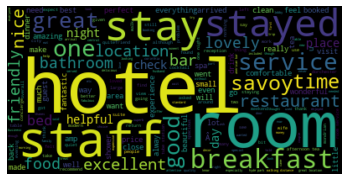

In [121]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

df1 = pd.read_csv("new_London_hotel_reviews.csv", encoding='latin-1')

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["London"])
textt = " ".join(review for review in df1.Review_Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('newlondonfeedback.png')
plt.show()

Popular words can be observed here such as room, hotel naturally but service, location, staff, breakfast, good, excellent, bar lovely, friendly, helpful, restaurant, nice, time, great, comfortable etc.

### Classifying Texts

Next I classify reviews into “positive” and “negative”.

Positive reviews are classified as +1, and negative reviews are classified as 0.

I classify all reviews with Score > 3 as +1, indicating that they are positive.

All reviews with Score < 3 will be classified as 0. Reviews with Score = 3 will be dropped, because they are neutral.

In [122]:
df1['Review_Rating'] = df1['Review_Rating'].astype(str).astype(float)

In [123]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df1 = df1[df1['Review_Rating'] != 3.0]
df1['sentiment_val'] = df1['Review_Rating'].apply(lambda rating : +1 if rating > 3 else 0)

In [124]:
df1.head()

,Unnamed: 0,Property_Name,Review_Rating,Review_Title,Date_Review,Review_Text,sentiment_val
0,1,Corinthia Hotel London,5.0,"By far, my best hotel in the world",3/23/2016,"i had a pleasure of staying in this hotel for 7 nights recently. this hotel was perfect in every way. communication with the hotel before staying was prompt, and very efficient. checking in was a breeze. you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. my room, they gave me an upgrade to junior suite, was spectacular. we had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s...",1
1,2,The Savoy,5.0,First visit to the American Bar at the Savoy,7/30/2013,"a very lovely first visit to this iconic hotel bar! | wonderful service, without being intrusive at all! very delicious cocktails and just generally all round, a very indulgent experience. | well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!",1
2,3,Rhodes Hotel,4.0,Nice stay,6/2/2012,"3 of us stayed at the rhodes hotel for 4 nights, its a great location for taking the paddington express from heathrow. we like the location clost to the partk and in walking distance of most locations. the room and bath were small compared to american hotels but very clean. we enjoyed the free wifi. the owners and the staff were very friendly and helpful with taxi's and resturant recomendations. we would stay there again.",1
3,4,The Savoy,5.0,Perfection,11/24/2017,form the moment we arrived until we left we experienced absolute perfection in service excellance by every member of the savoy staff. famous for its personalise service and rich heritage the savoy is truly won of the best hotels in the world to stay at. for eating and dining woud highly recommend kaspers restaurant. for ourselves we cannot wait until we return.,1
4,5,Corinthia Hotel London,1.0,Staff stole from me!!,3/1/2013,well i am no strange to london's 5star hotels and when a new one comes along i am eager to try. so i heard about the corinthia via some friends who work in the industry and said their bar was really something. until the incident i had stay there a total of 3 times but on the 4th time in june i was on my second of 4 nights and was about get some cash from my room as i was going to exchange money for some dollars as i was flying to the us pretty soon. when i came to my money it felt light. whe...,0


In [125]:
df1.drop(['Unnamed: 0'], axis = 1, inplace = True)
df1.head()

,Property_Name,Review_Rating,Review_Title,Date_Review,Review_Text,sentiment_val
0,Corinthia Hotel London,5.0,"By far, my best hotel in the world",3/23/2016,"i had a pleasure of staying in this hotel for 7 nights recently. this hotel was perfect in every way. communication with the hotel before staying was prompt, and very efficient. checking in was a breeze. you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. my room, they gave me an upgrade to junior suite, was spectacular. we had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s...",1
1,The Savoy,5.0,First visit to the American Bar at the Savoy,7/30/2013,"a very lovely first visit to this iconic hotel bar! | wonderful service, without being intrusive at all! very delicious cocktails and just generally all round, a very indulgent experience. | well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!",1
2,Rhodes Hotel,4.0,Nice stay,6/2/2012,"3 of us stayed at the rhodes hotel for 4 nights, its a great location for taking the paddington express from heathrow. we like the location clost to the partk and in walking distance of most locations. the room and bath were small compared to american hotels but very clean. we enjoyed the free wifi. the owners and the staff were very friendly and helpful with taxi's and resturant recomendations. we would stay there again.",1
3,The Savoy,5.0,Perfection,11/24/2017,form the moment we arrived until we left we experienced absolute perfection in service excellance by every member of the savoy staff. famous for its personalise service and rich heritage the savoy is truly won of the best hotels in the world to stay at. for eating and dining woud highly recommend kaspers restaurant. for ourselves we cannot wait until we return.,1
4,Corinthia Hotel London,1.0,Staff stole from me!!,3/1/2013,well i am no strange to london's 5star hotels and when a new one comes along i am eager to try. so i heard about the corinthia via some friends who work in the industry and said their bar was really something. until the incident i had stay there a total of 3 times but on the 4th time in june i was on my second of 4 nights and was about get some cash from my room as i was going to exchange money for some dollars as i was flying to the us pretty soon. when i came to my money it felt light. whe...,0


### More Data Analysis

Next I will create two dataframes, one with all the positive reviews, and another with all the negative reviews.

In [126]:
# split df - positive and negative sentiment:
positive = df1[df1['sentiment_val'] == 1]
negative = df1[df1['sentiment_val'] == 0]

### Wordcloud — Positive Sentiment

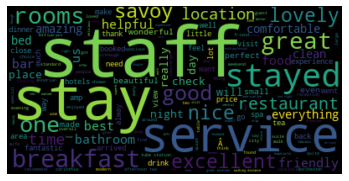

In [127]:
stopwords = set(STOPWORDS)
stopwords.update(["043E", "U", "london", "hotel", "room"]) 
## good was removed because they were included in negative sentiment

pos = " ".join(review for review in positive.Review_Text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.savefig('londonfeedbackpositive.png')
plt.axis("off")
plt.show()

### Wordcloud — Negative Sentiment

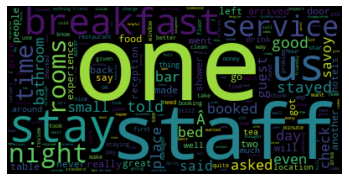

In [128]:
neg = " ".join(review for review in negative.Review_Text)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('londonfeedbacknegative.png')
plt.show()

In [129]:
df1['sentiment'] = df1['sentiment_val'].replace({0 : 'negative'})
df1['sentiment'] = df1['sentiment'].replace({1 : 'positive'})
fig = px.histogram(df1, x="sentiment")
fig.update_traces(marker_color="blue",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Hotel sentiment in selected hotels in London')
fig.show()

In [130]:
df1.head()

,Property_Name,Review_Rating,Review_Title,Date_Review,Review_Text,sentiment_val,sentiment
0,Corinthia Hotel London,5.0,"By far, my best hotel in the world",3/23/2016,"i had a pleasure of staying in this hotel for 7 nights recently. this hotel was perfect in every way. communication with the hotel before staying was prompt, and very efficient. checking in was a breeze. you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. my room, they gave me an upgrade to junior suite, was spectacular. we had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s...",1,positive
1,The Savoy,5.0,First visit to the American Bar at the Savoy,7/30/2013,"a very lovely first visit to this iconic hotel bar! | wonderful service, without being intrusive at all! very delicious cocktails and just generally all round, a very indulgent experience. | well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!",1,positive
2,Rhodes Hotel,4.0,Nice stay,6/2/2012,"3 of us stayed at the rhodes hotel for 4 nights, its a great location for taking the paddington express from heathrow. we like the location clost to the partk and in walking distance of most locations. the room and bath were small compared to american hotels but very clean. we enjoyed the free wifi. the owners and the staff were very friendly and helpful with taxi's and resturant recomendations. we would stay there again.",1,positive
3,The Savoy,5.0,Perfection,11/24/2017,form the moment we arrived until we left we experienced absolute perfection in service excellance by every member of the savoy staff. famous for its personalise service and rich heritage the savoy is truly won of the best hotels in the world to stay at. for eating and dining woud highly recommend kaspers restaurant. for ourselves we cannot wait until we return.,1,positive
4,Corinthia Hotel London,1.0,Staff stole from me!!,3/1/2013,well i am no strange to london's 5star hotels and when a new one comes along i am eager to try. so i heard about the corinthia via some friends who work in the industry and said their bar was really something. until the incident i had stay there a total of 3 times but on the 4th time in june i was on my second of 4 nights and was about get some cash from my room as i was going to exchange money for some dollars as i was flying to the us pretty soon. when i came to my money it felt light. whe...,0,negative
